Processing for exporting tables from SQL DB to CSV file:  
    1. Right-Click on the DB that contains the tables you want to export in the Object  
        Explorer window in Microsoft SQL Server Management Studio  
    2. Mouse over "Tasks" to expand, then select "Export Data..."  
    3. Click Next in SQL Server Import and Export Wizard, in the "Data Source" drop  
        down, select "Microsoft OLE DB Provider for SQL Server", click Next  
    4.In the "Destination" drop down, select "Flat File Destination", specify where and  
        what name to give to the CSV file  
    5. Click Next, Next, then in the "Source table or view" drop down select the table  
        you want to export  
    6. Click Next, Next, Finish  
    7. Repeat 1-6 for every table you want to export  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

plt.rcParams['figure.figsize'] = [20,15]
fact_table_portf = pd.read_csv('./olap/portf_table.csv')
fact_table_portf.update(fact_table_portf['day_10_avg'].mask(fact_table_portf['ticker_ID'] == 'CADUSD', lambda x: x*100.0))
fact_table_portf.update(fact_table_portf['day_10_avg'].mask(fact_table_portf['ticker_ID'] == 'NDX', lambda x: x/100.0))
fact_table_portf.update(fact_table_portf['day_10_avg'].mask(fact_table_portf['ticker_ID'] == 'PORTF', lambda x: x/1000.0))
fact_table_portf.update(fact_table_portf['day_100_avg'].mask(fact_table_portf['ticker_ID'] == 'CADUSD', lambda x: x*100.0))
fact_table_portf.update(fact_table_portf['day_100_avg'].mask(fact_table_portf['ticker_ID'] == 'NDX', lambda x: x/100.0))
fact_table_portf.update(fact_table_portf['day_100_avg'].mask(fact_table_portf['ticker_ID'] == 'PORTF', lambda x: x/1000.0))
fact_table_portf['date_ID'] = pd.to_datetime(fact_table_portf['date_ID'])
display(fact_table_portf)




,date_ID,ticker_ID,day_10_avg,day_100_avg,total_return,cumulative_return,annualized_return,volatility,sharpe_ratio,beta,percentage_change,portf_value
0,2023-01-01,CADUSD,73.773500,73.773500,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
1,2023-01-02,CADUSD,73.781700,73.781700,3.202320,0.022366,4.165723,NaN,NaN,NaN,0.022366,NaN
2,2023-01-03,AMD,65.008999,65.008999,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,99928.103540
3,2023-01-03,CADUSD,73.656100,73.656100,-71.518480,-0.499502,-45.624154,7.369030,NaN,NaN,-0.521751,99928.103540
4,2023-01-03,CL,78.959999,78.959999,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,99928.103540
...,...,...,...,...,...,...,...,...,...,...,...,...
3492,2024-07-02,IJH,58.400500,58.489255,2887.794602,19.809630,12.877182,12.632712,2.769371,0.426895,-0.539935,126788.951044
3493,2024-07-02,NDX,197.536580,183.351684,7803.085449,64.616618,44.225444,12.973733,NaN,NaN,0.571136,126788.951044
3494,2024-07-02,PG,166.668998,162.203099,1472.671118,10.357400,6.828200,10.574003,-0.052944,-0.001247,-0.557401,126788.951044
3495,2024-07-02,PORTF,127.695249,130.301249,26789.329059,26.789400,17.243200,12.161424,2.673842,0.572675,-0.112700,NaN


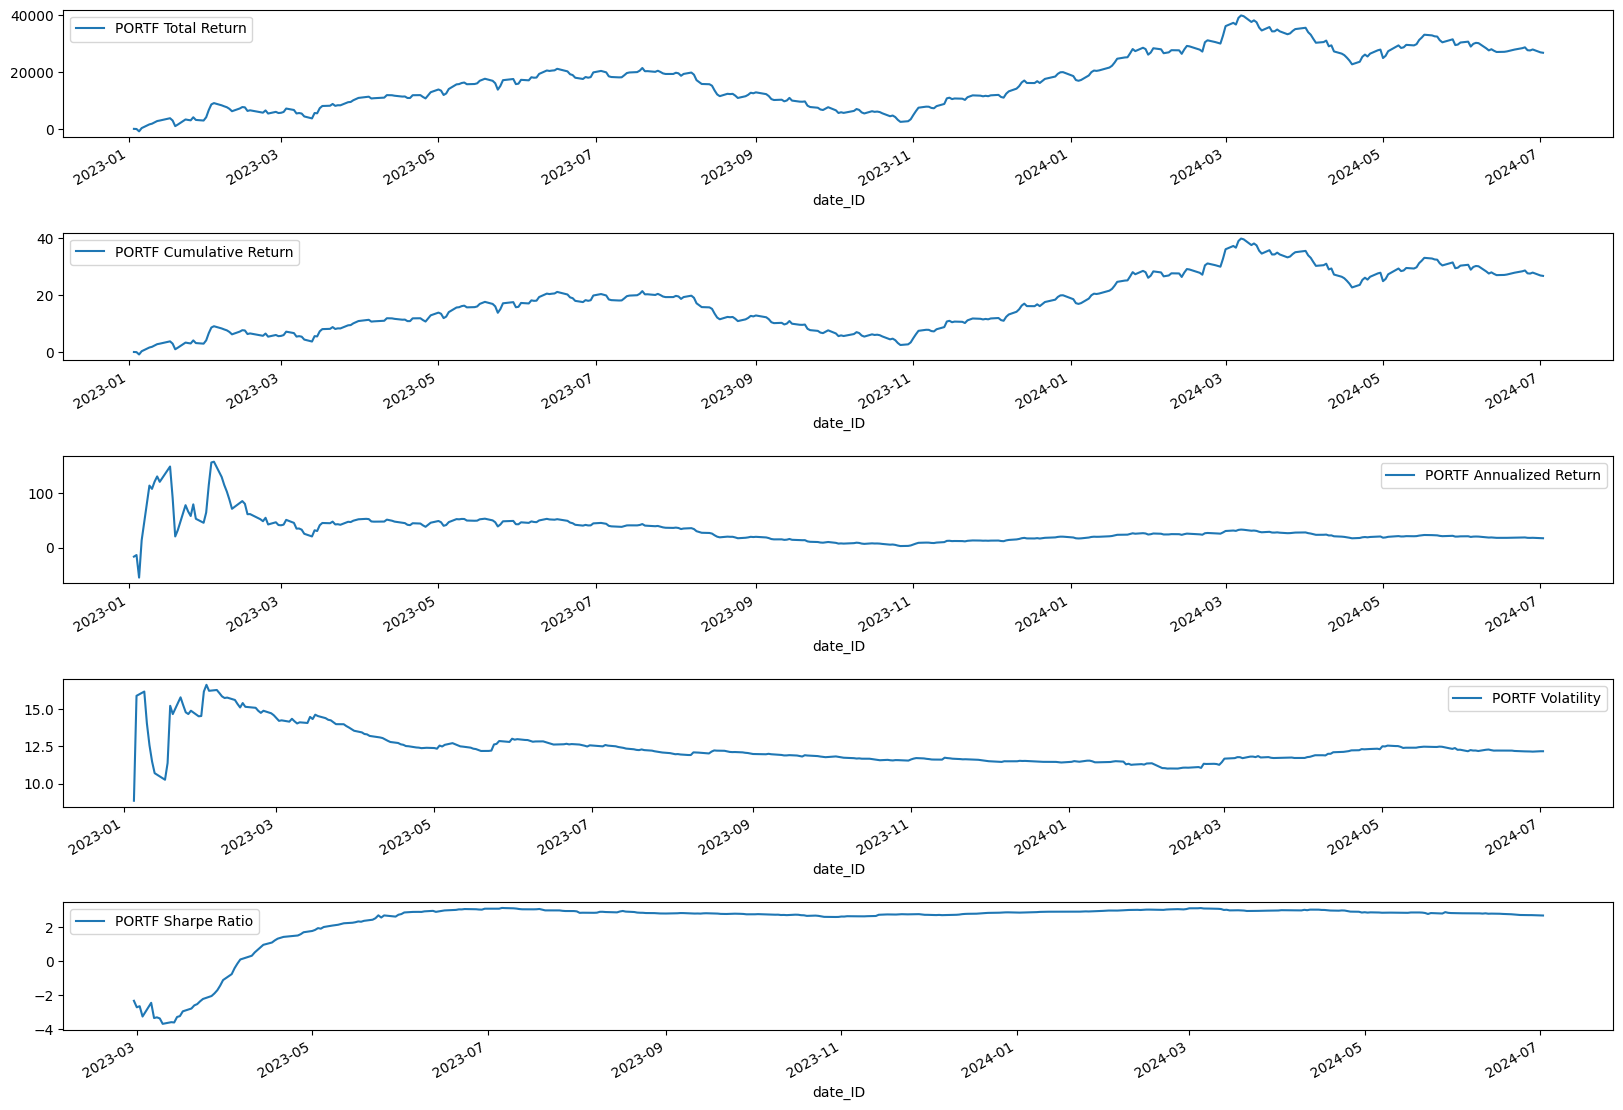

In [7]:
figure, axis = plt.subplots(5,1)
plt.subplots_adjust(hspace=0.75)
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[0], x='date_ID', y='total_return', label='PORTF Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[1], x='date_ID', y='cumulative_return', label='PORTF Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[2], x='date_ID', y='annualized_return', label='PORTF Annualized Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[3], x='date_ID', y='volatility', label='PORTF Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[4], x='date_ID', y='sharpe_ratio', label='PORTF Sharpe Ratio')
plt.show()

<Figure size 2000x1000 with 0 Axes>

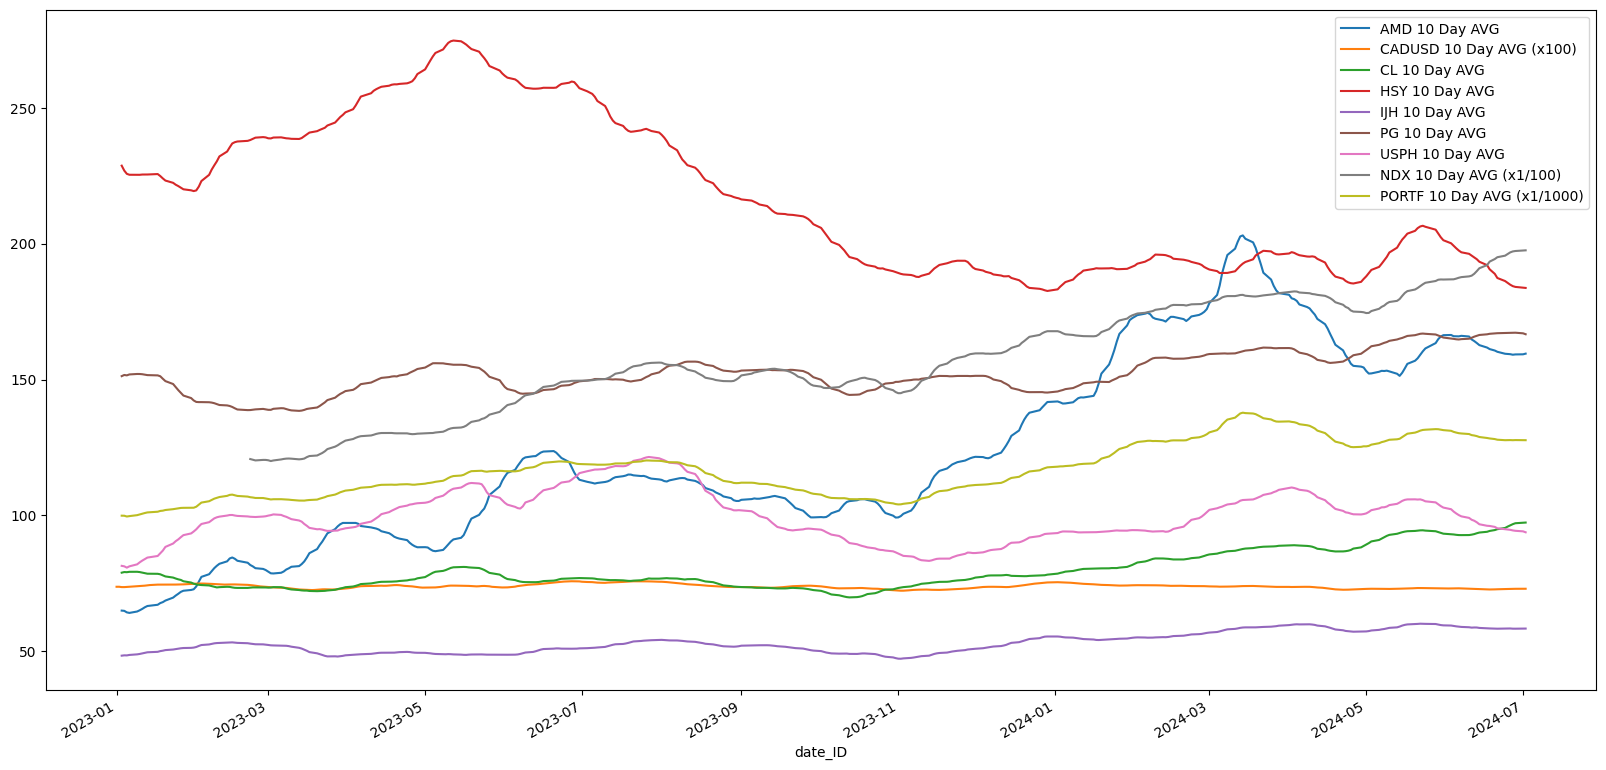

In [8]:
plt.rcParams['figure.figsize'] = [20,10]
plt.subplots_adjust(hspace=0.0)
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='day_10_avg', label='AMD 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=ax, x='date_ID', y='day_10_avg', label='CADUSD 10 Day AVG (x100)')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=ax, x='date_ID', y='day_10_avg', label='CL 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=ax, x='date_ID', y='day_10_avg', label='HSY 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=ax, x='date_ID', y='day_10_avg', label='IJH 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=ax, x='date_ID', y='day_10_avg', label='PG 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=ax, x='date_ID', y='day_10_avg', label='USPH 10 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=ax, x='date_ID', y='day_10_avg', label='NDX 10 Day AVG (x1/100)')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='day_10_avg', label='PORTF 10 Day AVG (x1/1000)')
plt.show()

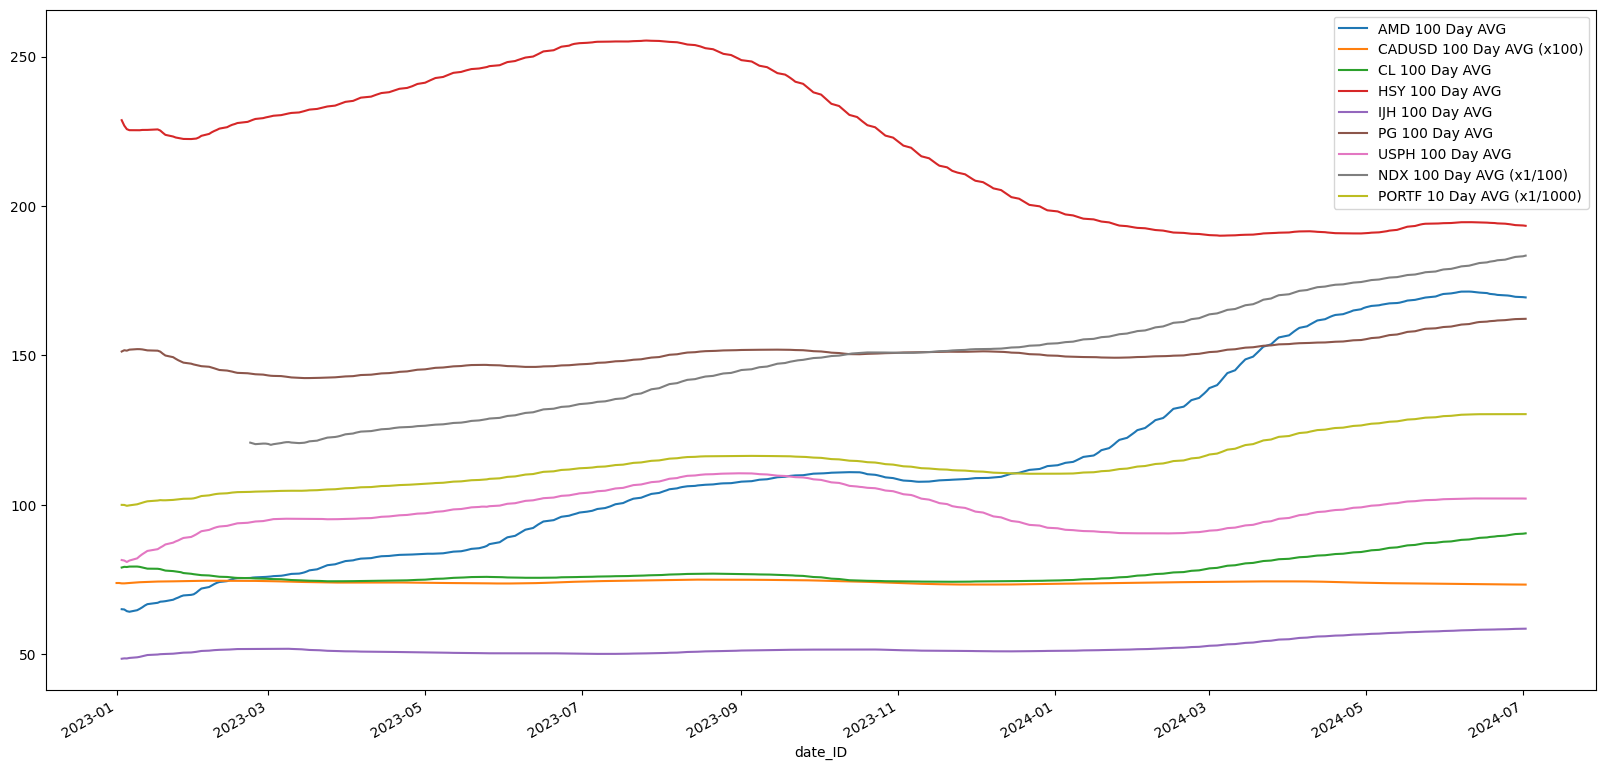

In [9]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='day_100_avg', label='AMD 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=ax, x='date_ID', y='day_100_avg', label='CADUSD 100 Day AVG (x100)')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=ax, x='date_ID', y='day_100_avg', label='CL 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=ax, x='date_ID', y='day_100_avg', label='HSY 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=ax, x='date_ID', y='day_100_avg', label='IJH 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=ax, x='date_ID', y='day_100_avg', label='PG 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=ax, x='date_ID', y='day_100_avg', label='USPH 100 Day AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=ax, x='date_ID', y='day_100_avg', label='NDX 100 Day AVG (x1/100)')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='day_100_avg', label='PORTF 10 Day AVG (x1/1000)')
plt.show()

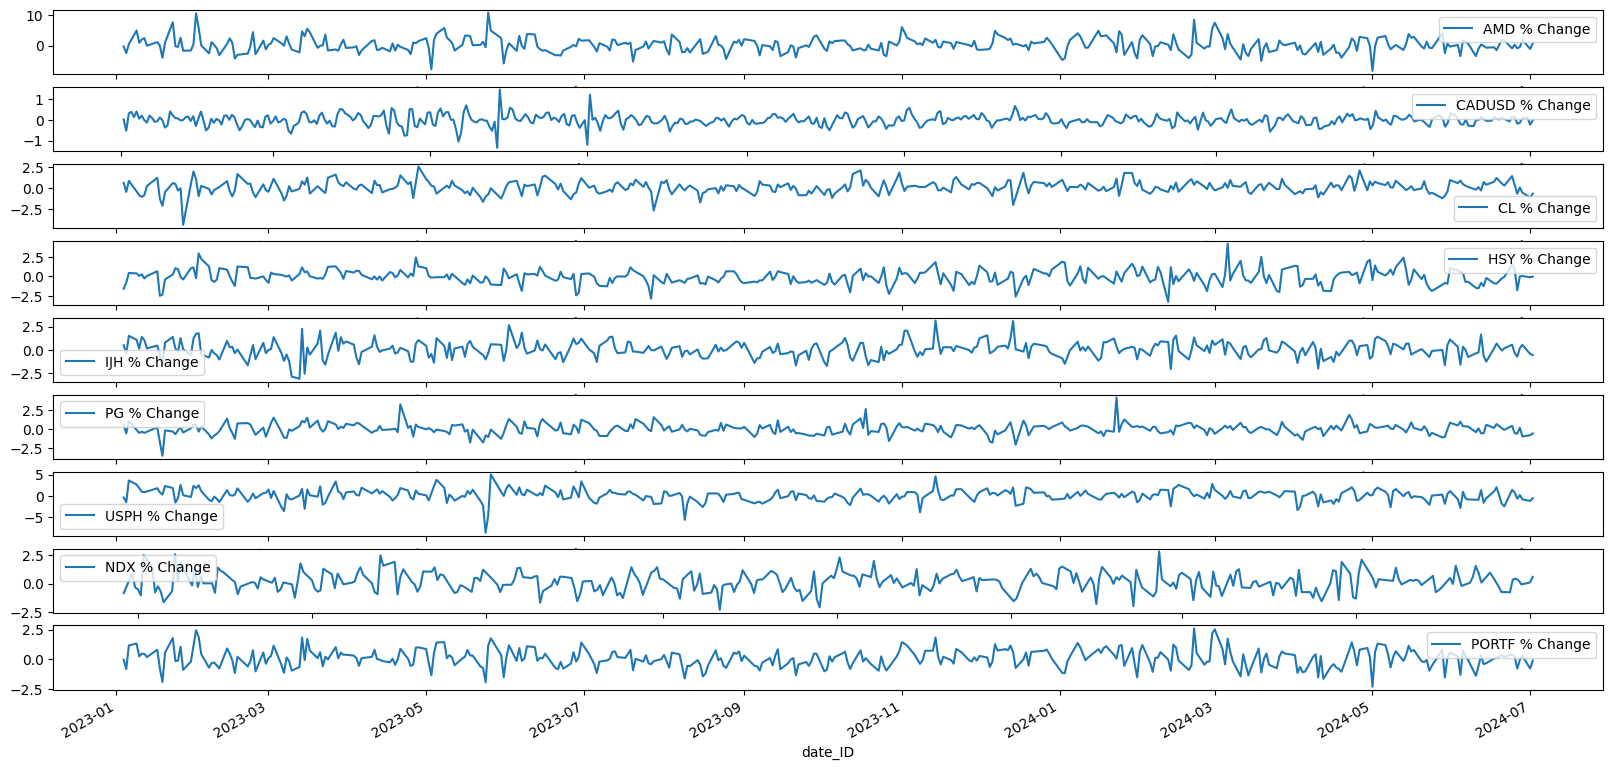

In [10]:
figure, axis = plt.subplots(9,1)
fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot( ax=axis[0], x='date_ID', y='percentage_change', label='AMD % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[1], x='date_ID', y='percentage_change', label='CADUSD % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=axis[2], x='date_ID', y='percentage_change', label='CL % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=axis[3], x='date_ID', y='percentage_change', label='HSY % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=axis[4], x='date_ID', y='percentage_change', label='IJH % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=axis[5], x='date_ID', y='percentage_change', label='PG % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=axis[6], x='date_ID', y='percentage_change', label='USPH % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=axis[7], x='date_ID', y='percentage_change', label='NDX % Change')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[8], x='date_ID', y='percentage_change', label='PORTF % Change')
plt.show()

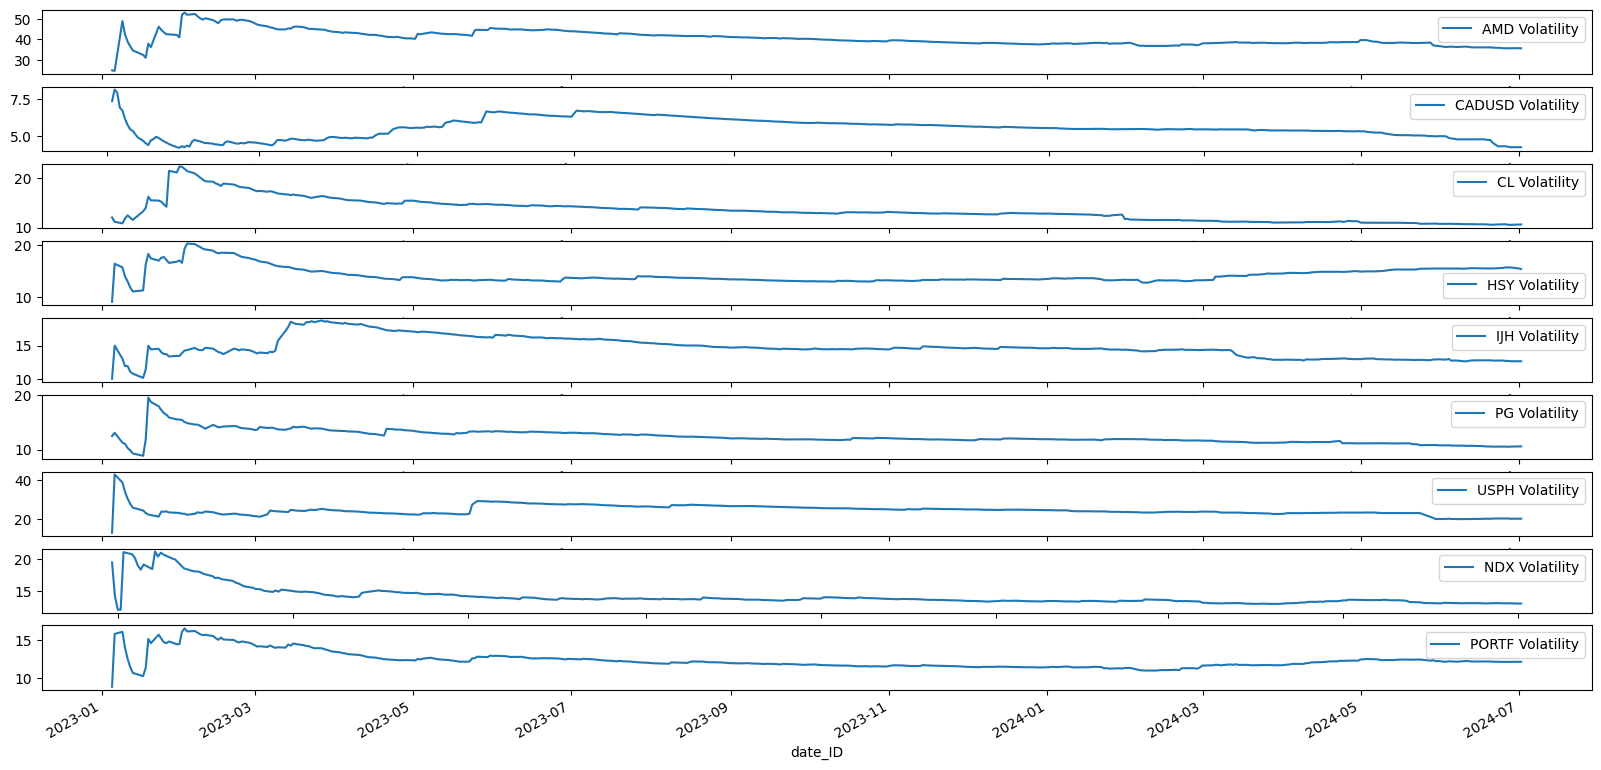

In [11]:
figure, axis = plt.subplots(9,1)
fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot( ax=axis[0], x='date_ID', y='volatility', label='AMD Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[1], x='date_ID', y='volatility', label='CADUSD Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=axis[2], x='date_ID', y='volatility', label='CL Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=axis[3], x='date_ID', y='volatility', label='HSY Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=axis[4], x='date_ID', y='volatility', label='IJH Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=axis[5], x='date_ID', y='volatility', label='PG Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=axis[6], x='date_ID', y='volatility', label='USPH Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=axis[7], x='date_ID', y='volatility', label='NDX Volatility')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[8], x='date_ID', y='volatility', label='PORTF Volatility')
plt.show()

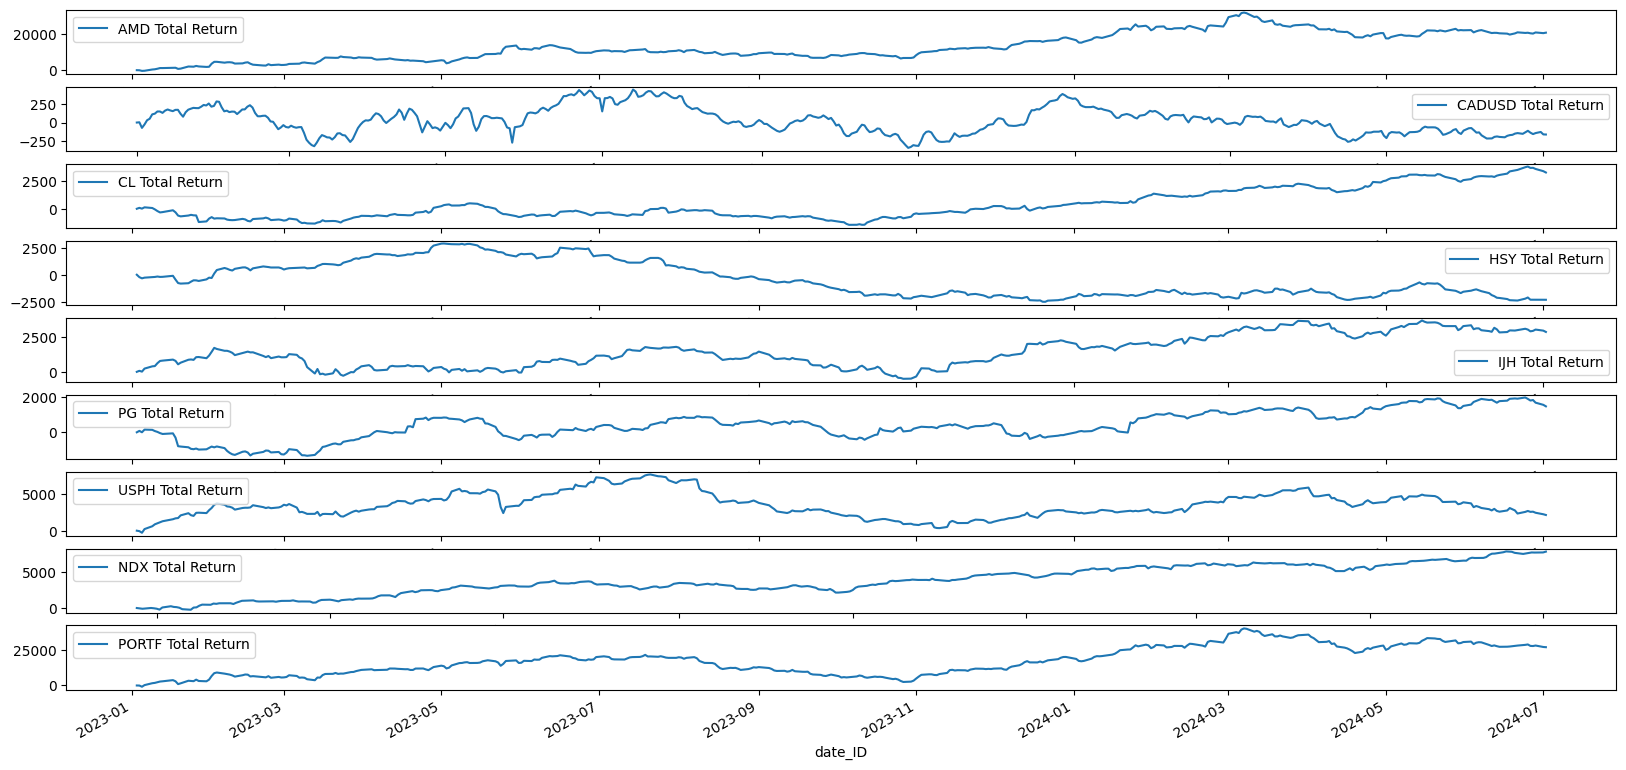

In [12]:
figure, axis = plt.subplots(9,1)
fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot( ax=axis[0], x='date_ID', y='total_return', label='AMD Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[1], x='date_ID', y='total_return', label='CADUSD Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=axis[2], x='date_ID', y='total_return', label='CL Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=axis[3], x='date_ID', y='total_return', label='HSY Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=axis[4], x='date_ID', y='total_return', label='IJH Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=axis[5], x='date_ID', y='total_return', label='PG Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=axis[6], x='date_ID', y='total_return', label='USPH Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=axis[7], x='date_ID', y='total_return', label='NDX Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=axis[8], x='date_ID', y='total_return', label='PORTF Total Return')
plt.show()

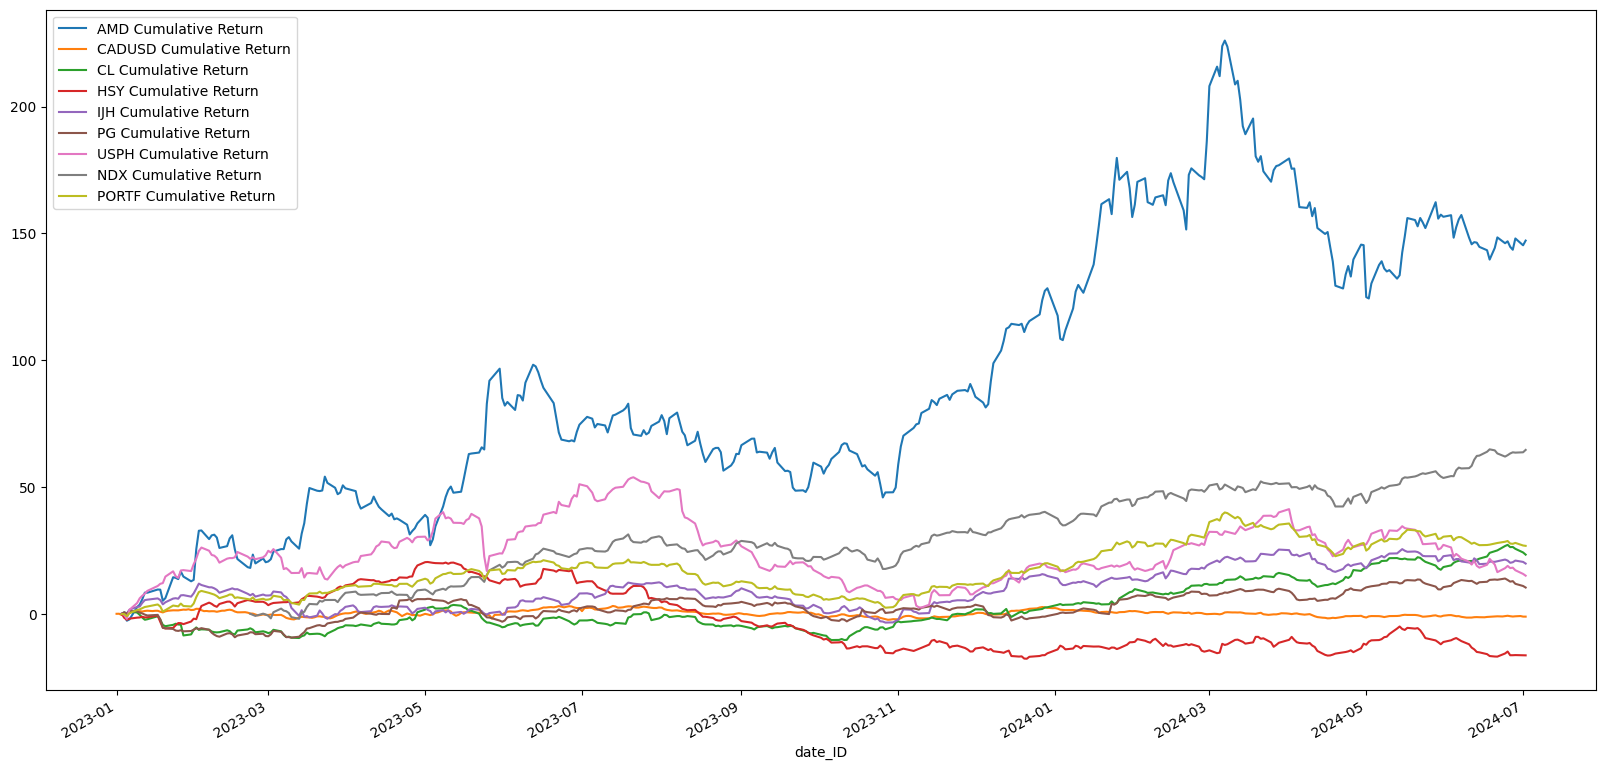

In [13]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='cumulative_return', label='AMD Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=ax, x='date_ID', y='cumulative_return', label='CADUSD Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=ax, x='date_ID', y='cumulative_return', label='CL Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=ax, x='date_ID', y='cumulative_return', label='HSY Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=ax, x='date_ID', y='cumulative_return', label='IJH Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=ax, x='date_ID', y='cumulative_return', label='PG Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=ax, x='date_ID', y='cumulative_return', label='USPH Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=ax, x='date_ID', y='cumulative_return', label='NDX Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='cumulative_return', label='PORTF Cumulative Return')
plt.show()

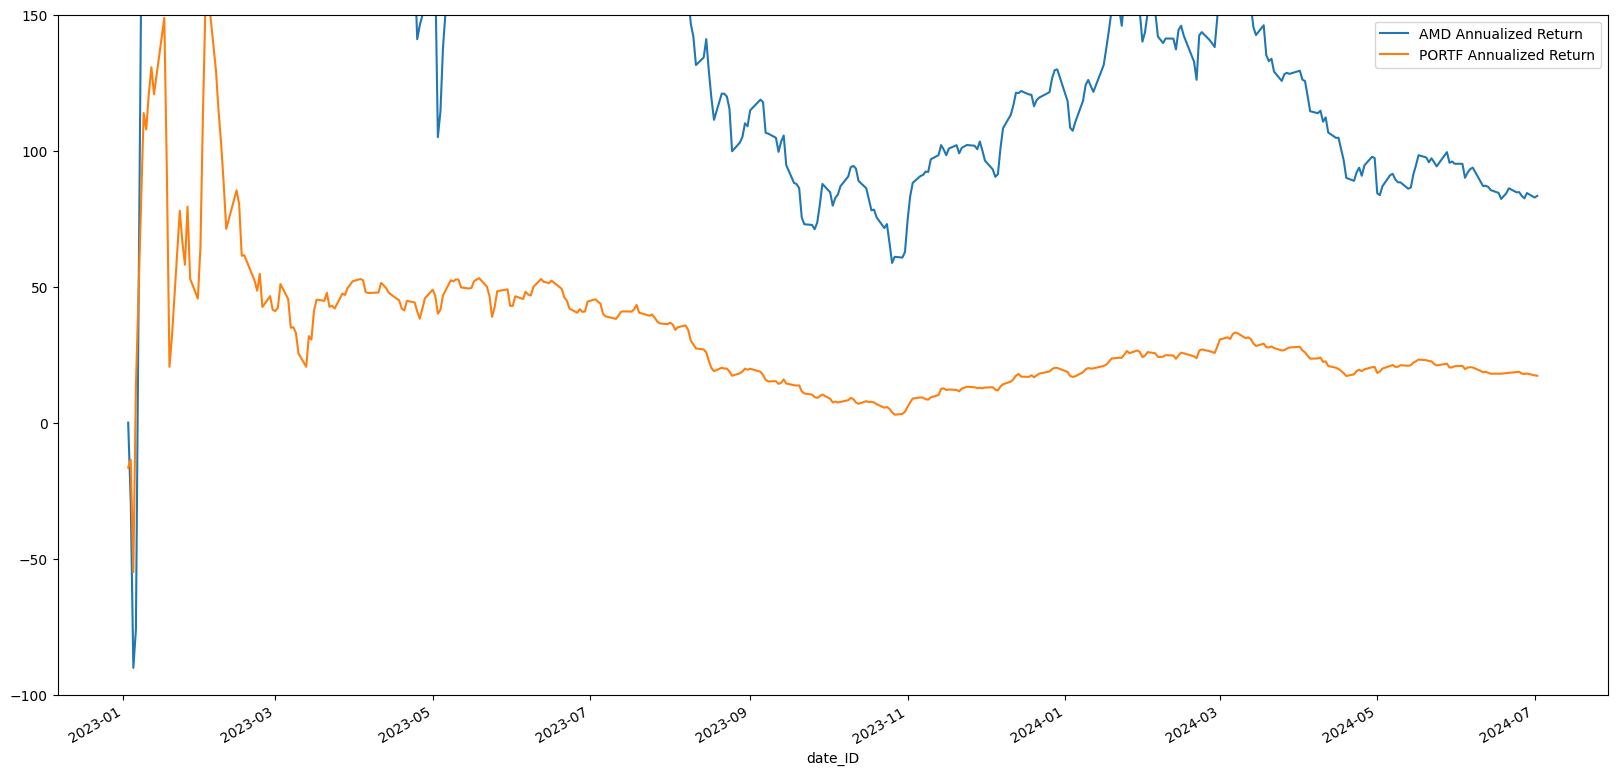

In [30]:

ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='annualized_return', label='AMD Annualized Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='annualized_return', label='PORTF Annualized Return')
ax.set_ylim([-100.0, 150.0])
plt.show()

In [15]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='annualized_return', label='PORTF Annualized Return')
plt.show()

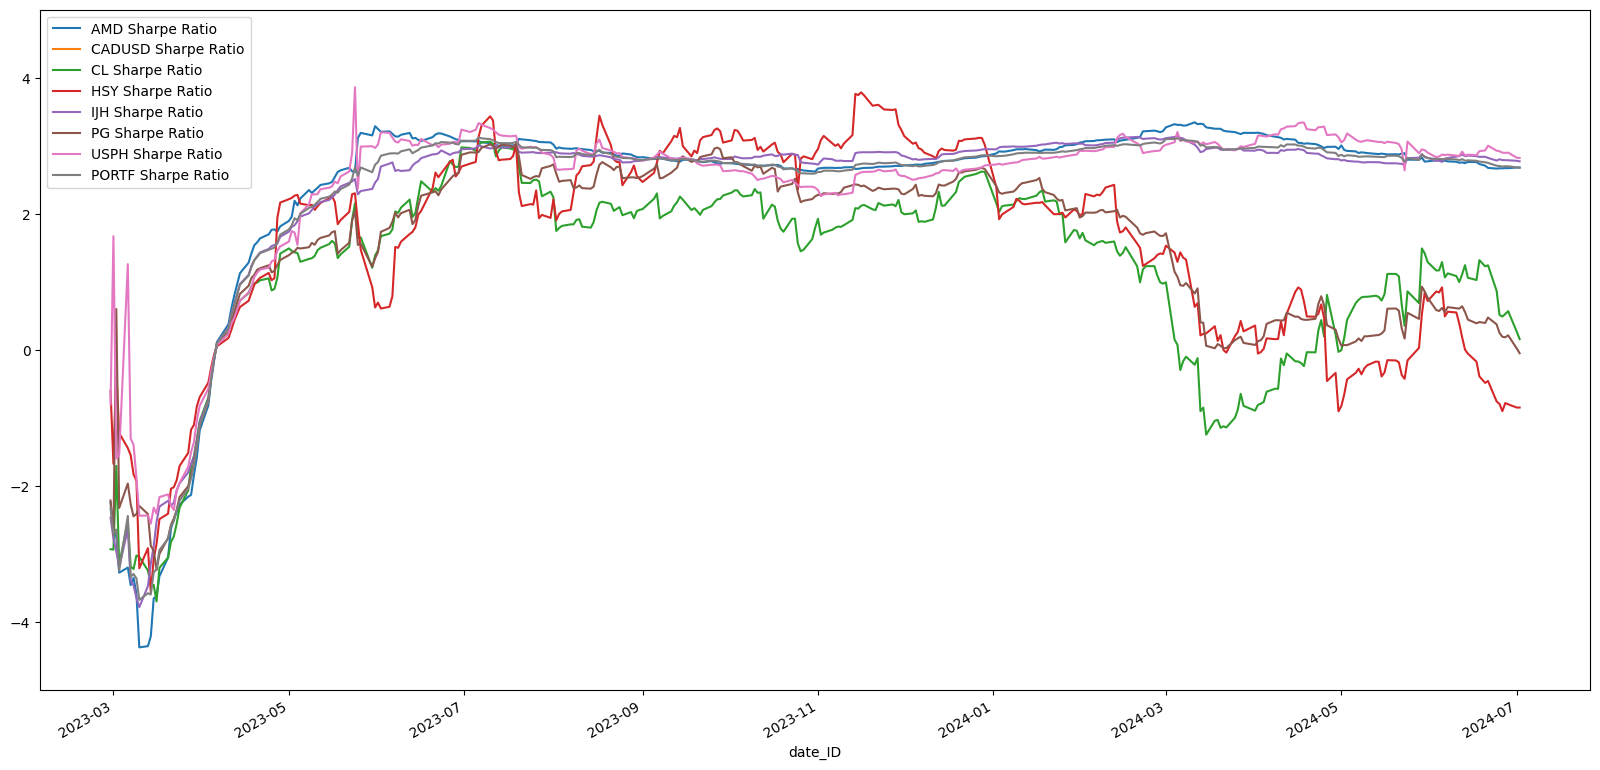

In [16]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='sharpe_ratio', label='AMD Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='CADUSD Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='CL Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='HSY Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='IJH Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='PG Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='USPH Sharpe Ratio')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='sharpe_ratio', label='PORTF Sharpe Ratio')
ax.set_ylim([-5.0, 5.0])
plt.show()

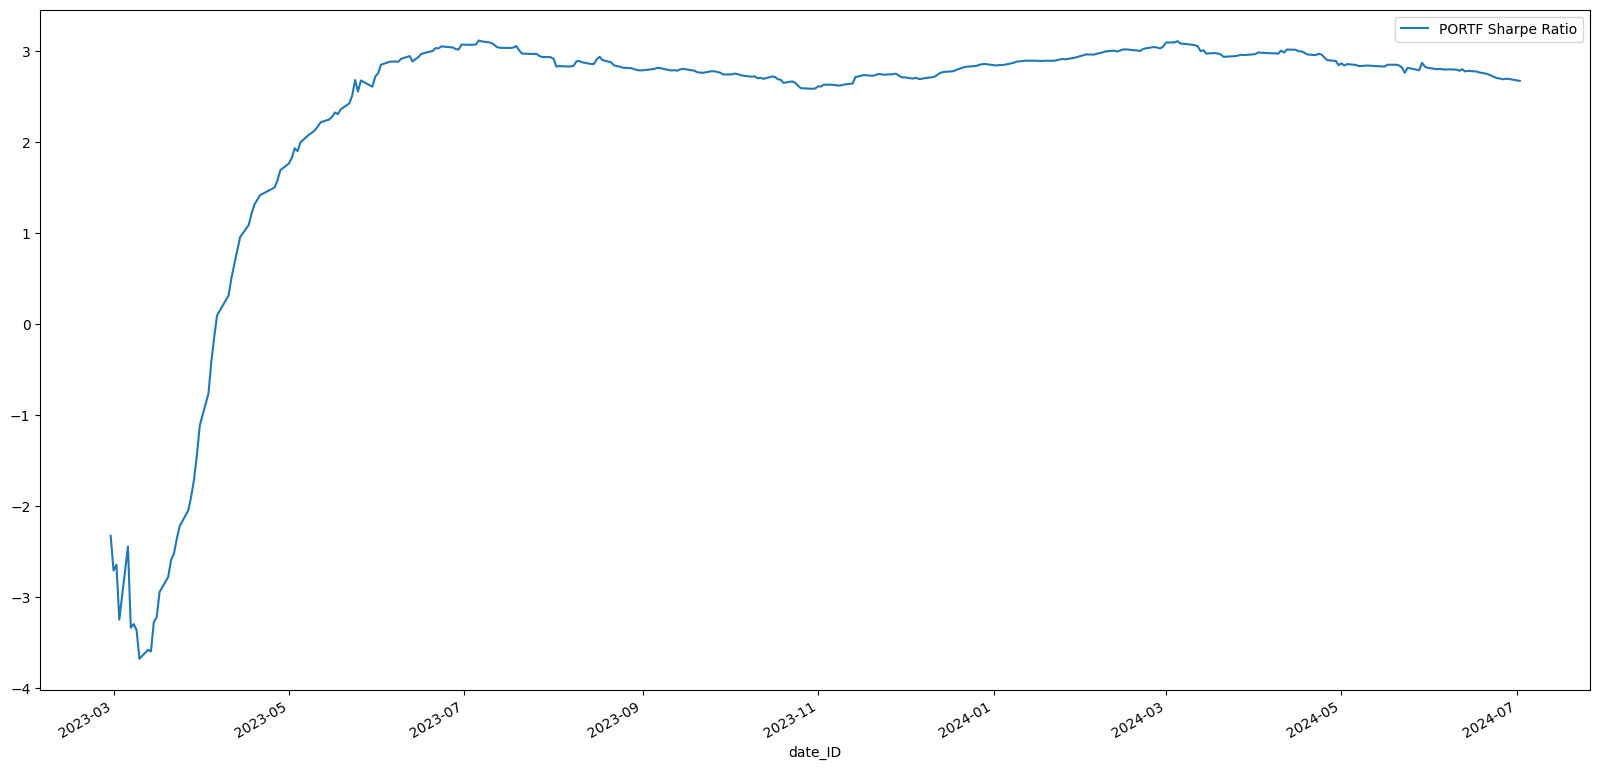

In [17]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(x='date_ID', y='sharpe_ratio', label='PORTF Sharpe Ratio')

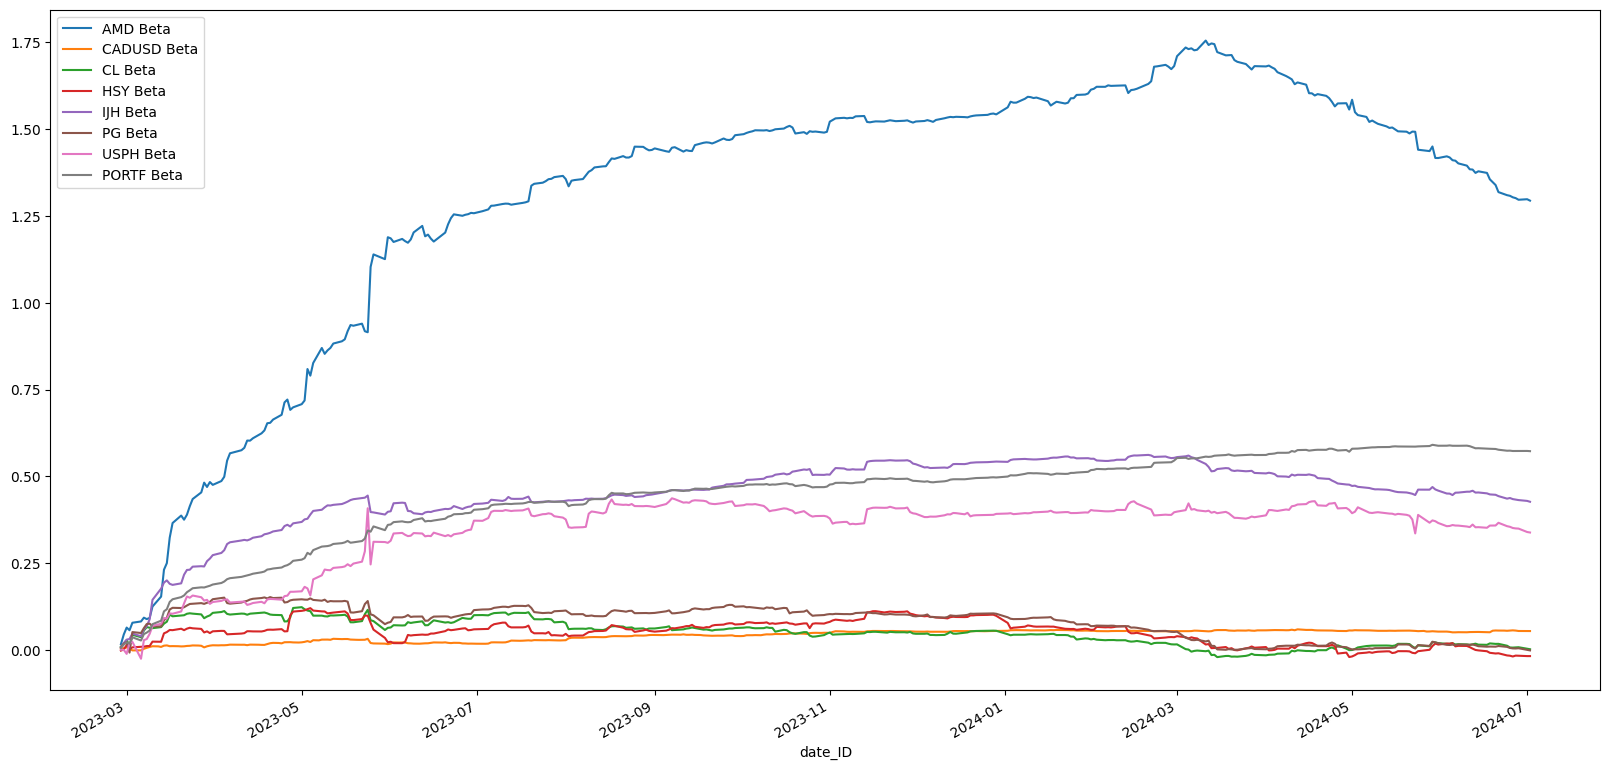

In [18]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'AMD'].plot(x='date_ID', y='beta', label='AMD Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=ax, x='date_ID', y='beta', label='CADUSD Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CL'].plot(ax=ax, x='date_ID', y='beta', label='CL Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'HSY'].plot(ax=ax, x='date_ID', y='beta', label='HSY Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'IJH'].plot(ax=ax, x='date_ID', y='beta', label='IJH Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PG'].plot(ax=ax, x='date_ID', y='beta', label='PG Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'USPH'].plot(ax=ax, x='date_ID', y='beta', label='USPH Beta')
fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='beta', label='PORTF Beta')

plt.show()

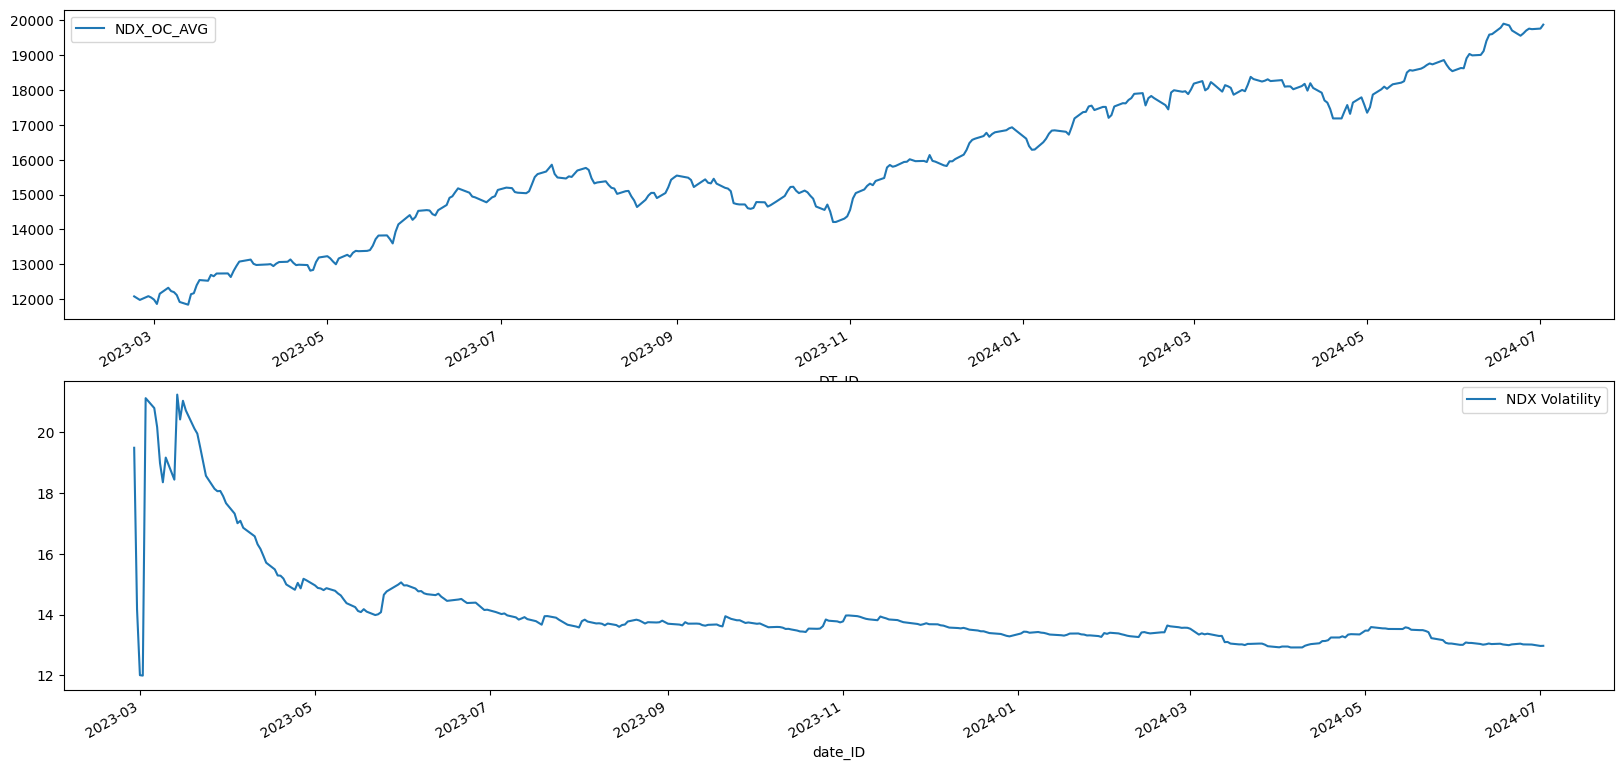

In [19]:
index_data = pd.read_csv('./olap/ndx_oc_avg.csv')
index_data['DT_ID'] = pd.to_datetime(index_data['DT_ID'])
figure, axis = plt.subplots(2,1)
index_data.plot(ax=axis[0],x='DT_ID', y='NDX_OC_AVG')
fact_table_portf[fact_table_portf['ticker_ID'] == 'NDX'].plot(ax=axis[1], x='date_ID', y='volatility', label='NDX Volatility')
plt.show()

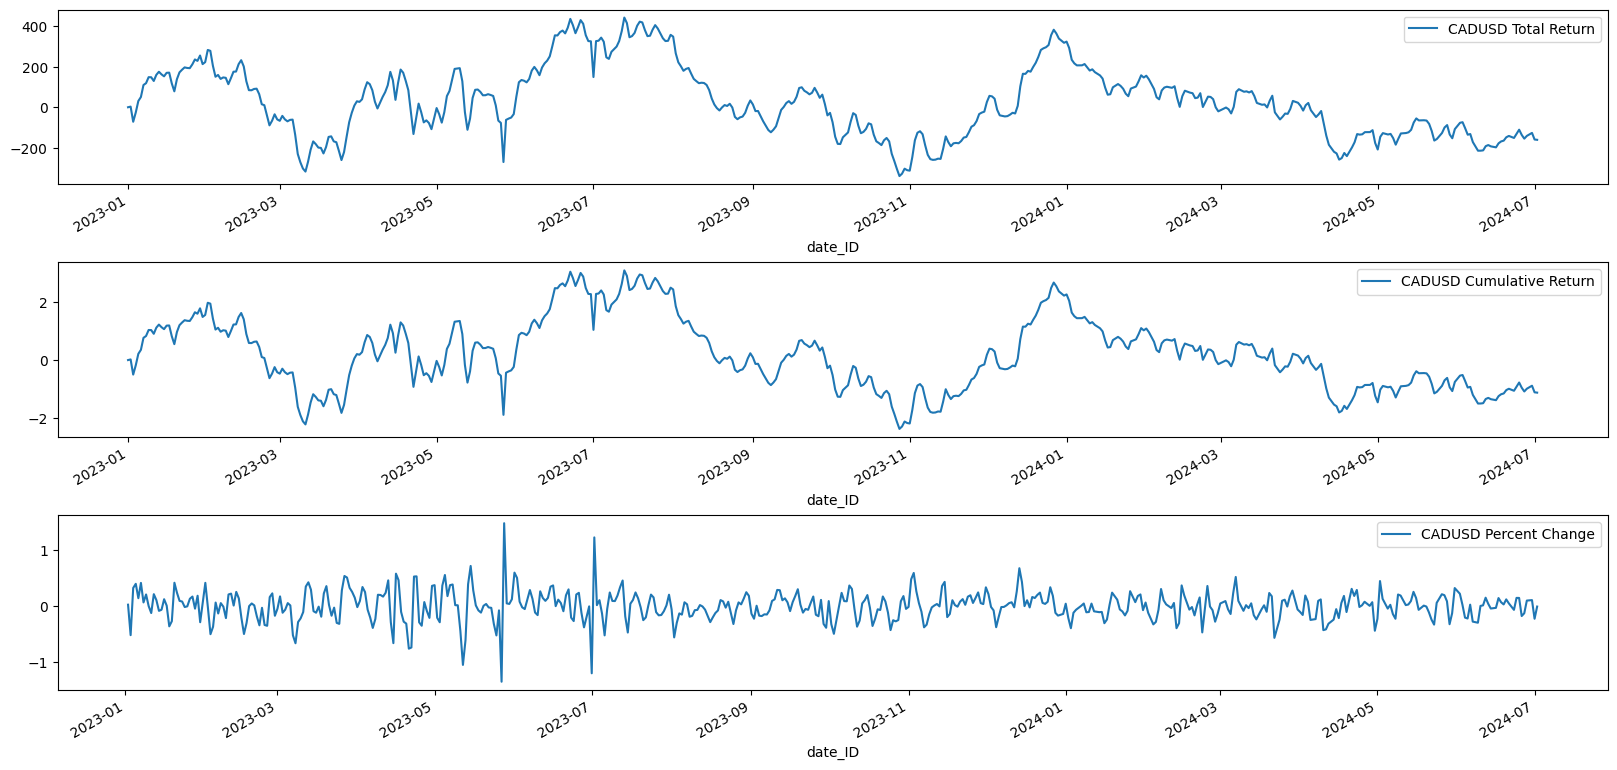

In [20]:
figure, axis = plt.subplots(3,1)
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[0], x='date_ID', y='total_return', label='CADUSD Total Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[1], x='date_ID', y='cumulative_return', label='CADUSD Cumulative Return')
fact_table_portf[fact_table_portf['ticker_ID'] == 'CADUSD'].plot(ax=axis[2], x='date_ID', y='percentage_change', label='CADUSD Percent Change')
plt.subplots_adjust(hspace=0.45)
plt.show()

In the cell below, I manually went into the tick_table csv file and removed a ',' from the name of the company U.S. Physical Therapy, Inc.

CSV is delimited by ','. So in order for it to read in correctly this was necessary

,buy_in_price,full_name,number_purchased,portf_weight,div_value,div_date
ticker,,,,,,
AMD,65.008999,AMD,219,0.142370,0.0000,NaN
CADUSD,0.737735,CAD/USD Forex,19408,0.143180,0.0000,NaN
CL,78.959999,Colagate-Palmolive Company,180,0.142129,0.0206,2023-07-19 00:00:00
HSY,228.684998,The Hershy Company,62,0.141785,0.0298,2023-06-16 00:00:00
IJH,48.431000,iShares Core S&P Mid-Cap ETF,301,0.145778,0.0000,NaN
PG,151.260002,The Procter & Gamble Company,94,0.142185,0.0244,2023-04-18 00:00:00
USPH,81.469997,U.S. Physical Therapy Inc.,175,0.142573,0.0191,2023-06-22 00:00:00


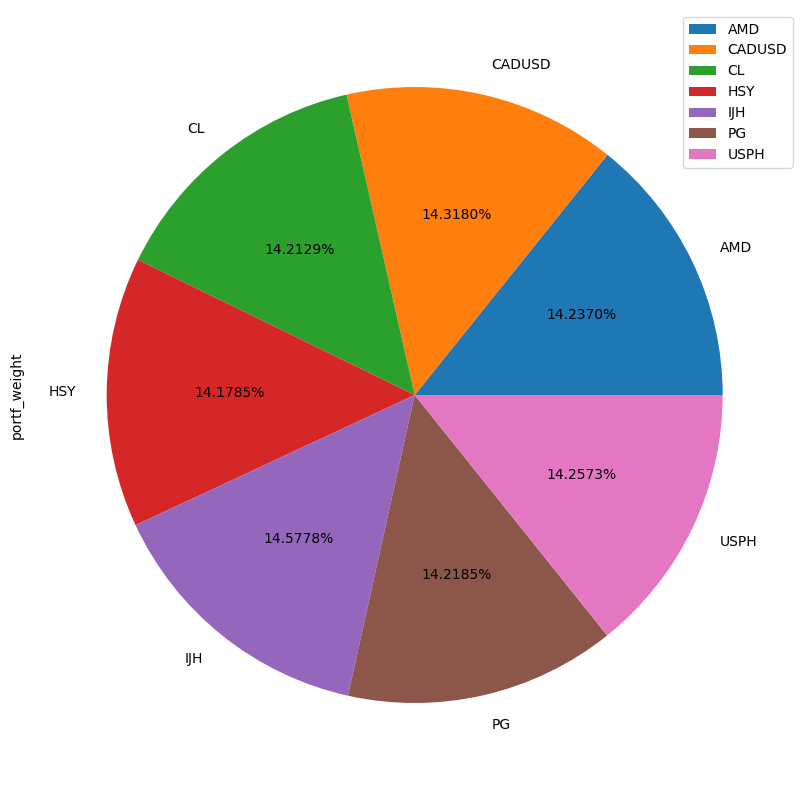

In [21]:
#add in markdown, removed the , from U.S. Physical Therapy, Inc.
import numpy as np
ticker_data = pd.read_csv('./olap/tick_table.csv')
filter_list = ['NDX', 'PORTF']
tick_d = ticker_data[~ticker_data['ticker'].isin(filter_list)]
tick_d.set_index('ticker', inplace=True)
tick_d.plot.pie(y='portf_weight', autopct='%1.4f%%')
display(tick_d)


17465.525602


,ticker,stock_weight
0,AMD,0.277531
1,CADUSD,0.111662
2,CL,0.136020
3,HSY,0.089698
4,IJH,0.137753
5,PG,0.121024
6,USPH,0.126313


<Axes: ylabel='stock_weight'>

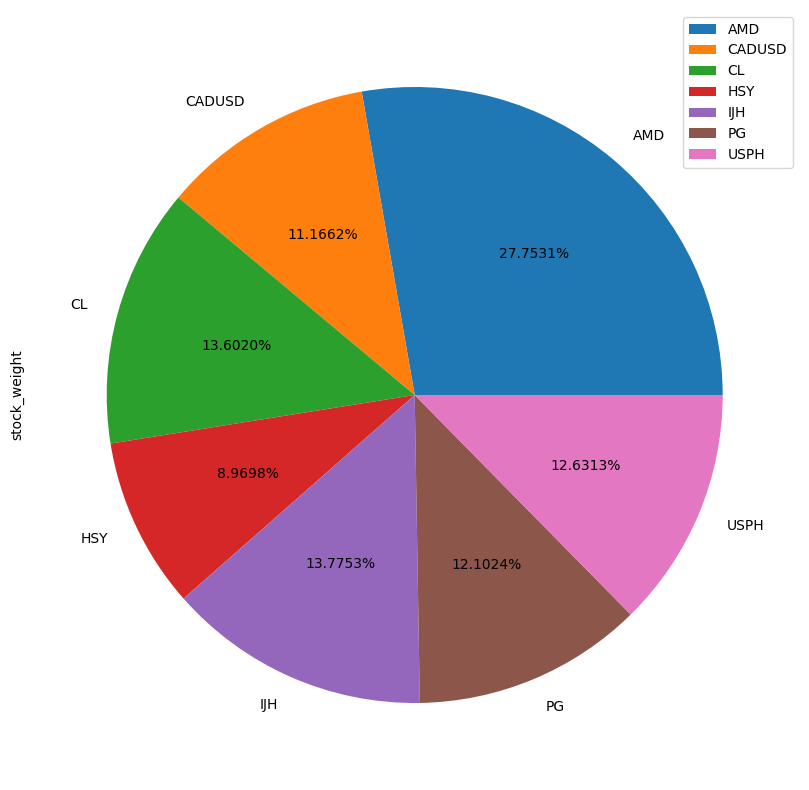

In [22]:
init_invest = ticker_data[ticker_data['ticker'] == 'PORTF']['buy_in_price']
amd_oc = pd.read_csv('./olap/amd_oc_avg.csv')
amd_final_val = amd_oc['AMD_OC_AVG'][amd_oc['AMD_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'AMD']['number_purchased'].values[0]
cadusd_oc = pd.read_csv('./olap/cadusd_oc_avg.csv')
cadusd_final_val = cadusd_oc['CADUSD_OC_AVG'][cadusd_oc['CADUSD_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'CADUSD']['number_purchased'].values[0]
cl_oc = pd.read_csv('./olap/cl_oc_avg.csv')
cl_final_val = cl_oc['CL_OC_AVG'][cl_oc['CL_OC_AVG'].size - 1]*ticker_data.loc[ticker_data['ticker'] == 'CL','number_purchased'].values[0]
hsy_oc = pd.read_csv('./olap/hsy_oc_avg.csv')
hsy_final_val = hsy_oc['HSY_OC_AVG'][hsy_oc['HSY_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'HSY']['number_purchased'].values[0]
ijh_oc = pd.read_csv('./olap/ijh_oc_avg.csv')
ijh_final_val = ijh_oc['IJH_OC_AVG'][ijh_oc['IJH_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'IJH']['number_purchased'].values[0]
pg_oc = pd.read_csv('./olap/pg_oc_avg.csv')
pg_final_val = pg_oc['PG_OC_AVG'][pg_oc['PG_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'PG']['number_purchased'].values[0]
usph_oc = pd.read_csv('./olap/usph_oc_avg.csv')
usph_final_val = usph_oc['USPH_OC_AVG'][usph_oc['USPH_OC_AVG'].size - 1]*ticker_data[ticker_data['ticker'] == 'USPH']['number_purchased'].values[0]
final_portf_value = usph_final_val+pg_final_val+ijh_final_val+hsy_final_val+cl_final_val+cadusd_final_val+amd_final_val
print(ijh_final_val)
final_weight = pd.DataFrame({
    'ticker' : ['AMD', 'CADUSD', 'CL', 'HSY', 'IJH', 'PG', 'USPH'],
    'stock_weight' : [(amd_final_val/final_portf_value), (cadusd_final_val/final_portf_value),
                      (cl_final_val/final_portf_value), (hsy_final_val/final_portf_value),
                      (ijh_final_val/final_portf_value), (pg_final_val/final_portf_value),
                      (usph_final_val/final_portf_value)]
})

display(final_weight)
final_weight.set_index('ticker', inplace=True)
final_weight.plot.pie(y='stock_weight', autopct='%1.4f%%')

In [24]:
ax = fact_table_portf[fact_table_portf['ticker_ID'] == 'PORTF'].plot(ax=ax, x='date_ID', y='annualized_return', label='PORTF Annualized Return')
plt.show()